# Python Team Porject
### Group member: Boduo Lin, Qiaochu Ma, Meng Zhang, Jiaren Han, Wenyuan Pan

## 1. Data Preprocessing

In [8]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib as plt
import numpy as np

In [41]:
# Concatenate two files
fuel1 = pd.read_csv('Fuel_Level_Part_1.csv')
fuel2 = pd.read_csv('Fuel_Level_Part_2.csv')
display(fuel1)
display(fuel2)

,Tank ID,Fuel Level,Time stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
885146,T 31,33770.0,8/15/2019 22:52
885147,T 31,33770.0,8/15/2019 23:08
885148,T 31,33770.0,8/15/2019 23:22
885149,T 31,33770.0,8/15/2019 23:37


,Tank ID,Fuel_Level,Timestamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10
...,...,...,...
974504,T 32,27619,8/15/2019 23:53
974505,T 22,31548,8/15/2019 23:57
974506,T 16,53492,8/15/2019 23:57
974507,T 18,27081,8/15/2019 23:57


In [43]:
fuel2.rename(columns= {'Fuel_Level' : 'Fuel Level'},inplace= True)
fuel1.rename(columns = {'Time stamp' : 'Timestamp'},inplace= True)

In [45]:
fuel_level = pd.concat([fuel1,fuel2])
display(fuel_level)

,Tank ID,Fuel Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
974504,T 32,27619.0,8/15/2019 23:53
974505,T 22,31548.0,8/15/2019 23:57
974506,T 16,53492.0,8/15/2019 23:57
974507,T 18,27081.0,8/15/2019 23:57


In [131]:
# Merge three datasets
tanks = pd.read_csv('Tanks.csv')
locations = pd.read_csv('Locations.csv')
invoices = pd.read_csv ('invoices.csv')
display(tanks.head(5))
display(locations.head(5))
display(invoices.head(5))

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity
0,T 10,1,1,U,40000
1,T 11,1,2,U,40000
2,T 12,1,3,D,40000
3,T 13,1,4,P,40000
4,T 14,1,5,U,40000


,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude
0,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
1,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.230700,-79.763930
2,3,Central,"80 Park St N, Hamilton, ON L8R 2M9, Canada",43.260260,-79.870580
3,4,Chedoke,"16 McMaster Ave, Dundas, ON L9H 0A8, Canada",43.261849,-79.937057
4,5,Mountain View,"985 Scenic Dr, Hamilton, ON L9C 1H7, Canada",43.244910,-79.921850


,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,1/2/2017,10000.0,1,7570.820,6609.600,G
1,1/2/2017,10001.0,1,12491.853,9338.736,D
2,1/2/2017,10002.0,1,NaN,NaN,NaN
3,1/2/2017,10002.0,2,17034.345,13377.824,D
4,1/2/2017,NaN,2,NaN,NaN,NaN


In [147]:
merge1= pd.merge(tanks, locations, left_on="Tank Location", right_on="Gas Station Location", how="inner")
gas_station = pd.merge(merge1, invoices, left_on="Gas Station Location", right_on="Invoice Gas Station Location", how="inner")
display(gas_station)
# We named the dataset that includes all three data as 'gas_station'

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/2/2017,10000.0,1,7570.82000,6609.600,G
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/2/2017,10001.0,1,12491.85300,9338.736,D
2,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/2/2017,10002.0,1,NaN,NaN,NaN
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/3/2017,10006.0,1,5670.54418,4239.216,D
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/3/2017,10007.0,1,7627.60115,6659.184,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,T 32,8,2,U,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,5/7/2019,12579.0,8,11863.47494,7037.712,G
12524,T 32,8,2,U,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,6/6/2019,12655.0,8,7495.11180,5231.008,G
12525,T 32,8,2,U,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,7/9/2019,12742.0,8,12359.36365,9056.336,G
12526,T 32,8,2,U,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,7/30/2019,12795.0,8,5678.11500,3158.640,D


<Axes: >

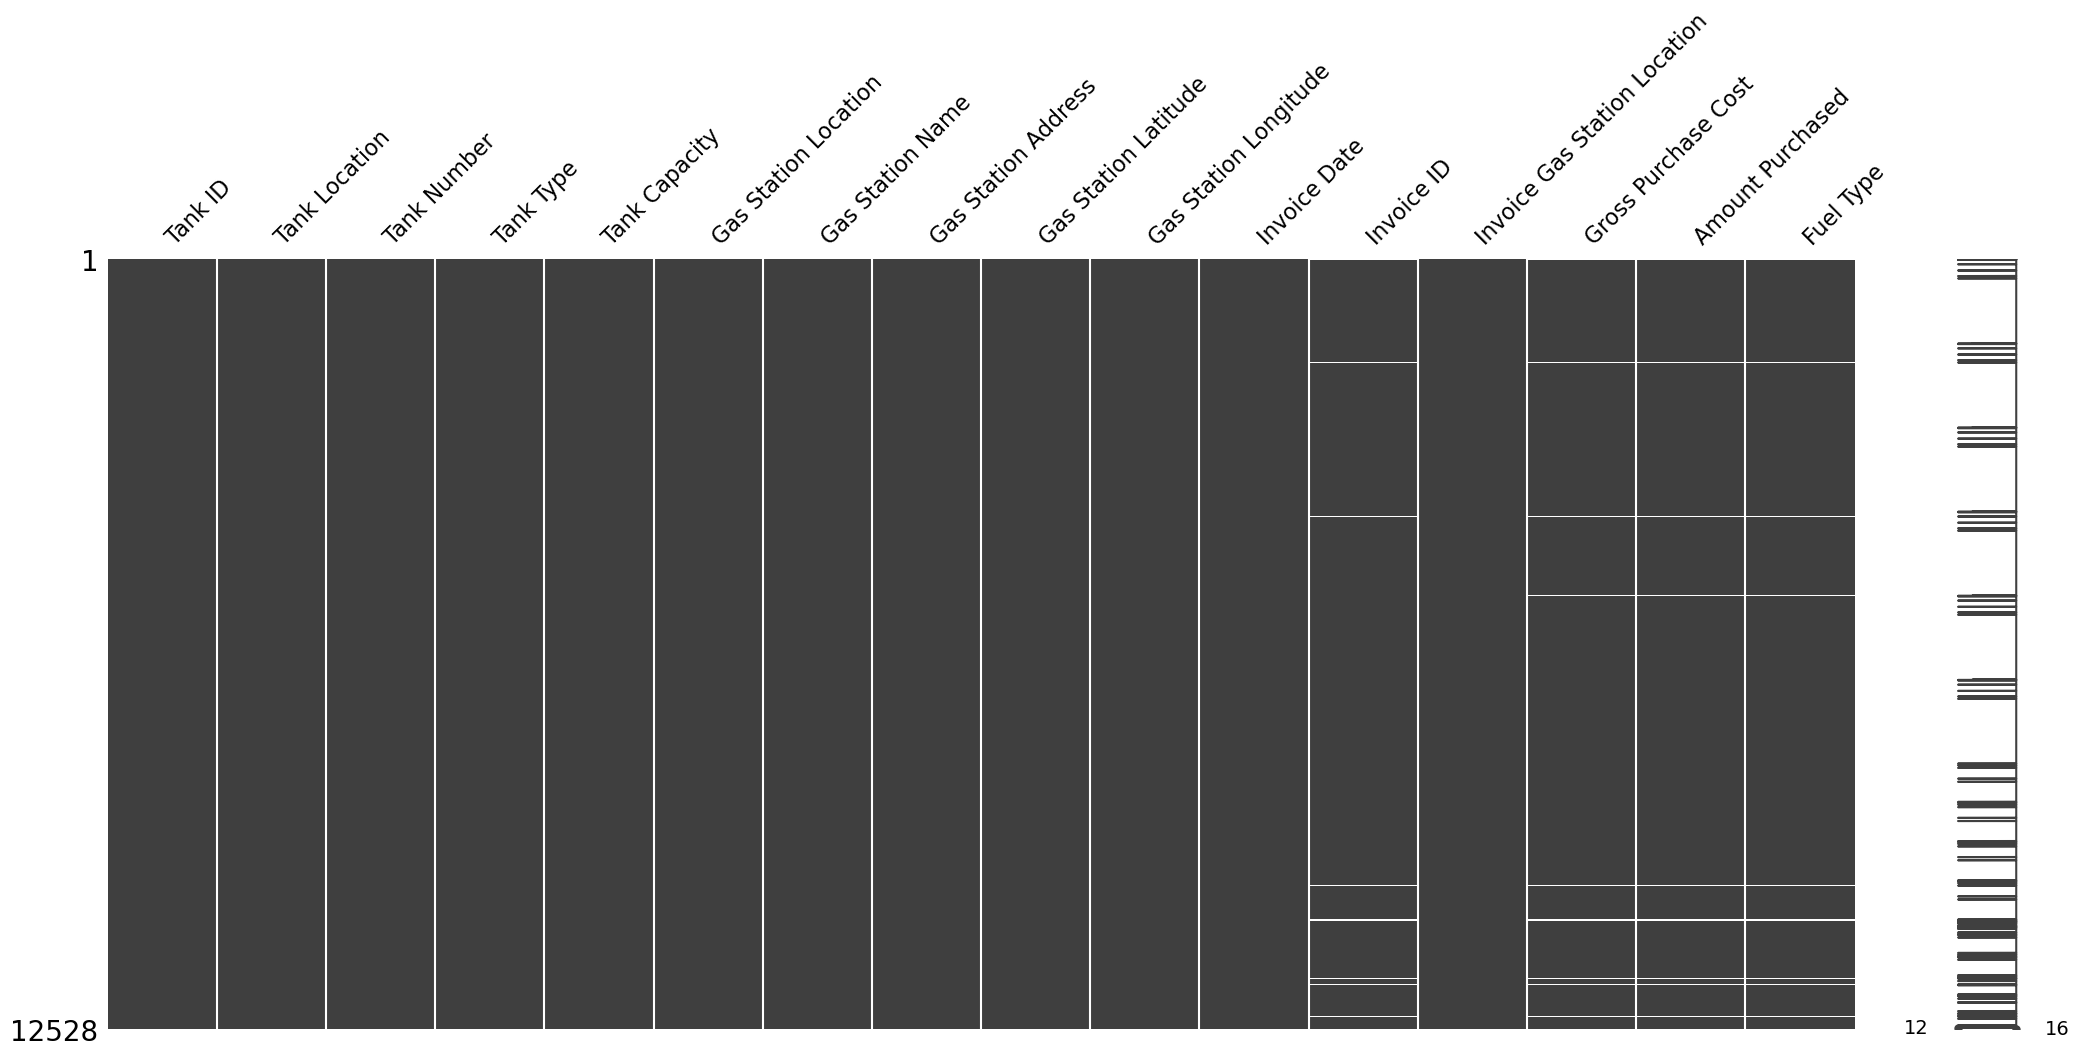

In [141]:
# Data cleaning
msno.matrix(gas_station)

In [143]:
gas_station.isnull().sum()

Tank ID                           0
Tank Location                     0
Tank Number                       0
Tank Type                         0
Tank Capacity                     0
Gas Station Location              0
Gas Station Name                  0
Gas Station Address               0
Gas Station Latitude              0
Gas Station Longitude             0
Invoice Date                      0
Invoice ID                      110
Invoice Gas Station Location      0
Gross Purchase Cost             116
Amount Purchased                116
Fuel Type                       116
dtype: int64

In [153]:
gas_station = gas_station.dropna()
gas_station
# we've dropped 116 rows with missing data, now they all have full data sources.

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/2/2017,10000.0,1,7570.82000,6609.600,G
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/2/2017,10001.0,1,12491.85300,9338.736,D
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/3/2017,10006.0,1,5670.54418,4239.216,D
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/3/2017,10007.0,1,7627.60115,6659.184,G
5,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,1/3/2017,10008.0,1,32175.98500,26704.960,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,T 32,8,2,U,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,5/7/2019,12579.0,8,11863.47494,7037.712,G
12524,T 32,8,2,U,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,6/6/2019,12655.0,8,7495.11180,5231.008,G
12525,T 32,8,2,U,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,7/9/2019,12742.0,8,12359.36365,9056.336,G
12526,T 32,8,2,U,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,7/30/2019,12795.0,8,5678.11500,3158.640,D
